## Classificação

As técnicas de classificação são uma parte essencial das aplicações de aprendizado de máquina e mineração de dados. Aproximadamente 70% dos problemas em Data Science são problemas de classificação. Uma técnica de classificação popular para prever resultados binomiais (y = 0 ou 1) é chamada de Regressão Logística. A regressão logística prevê resultados categóricos (valores binomiais / multinomiais de y), enquanto a regressão linear é boa para prever resultados de valor contínuo (como o peso de uma pessoa em kg, a quantidade de chuva em cm).

Na primeira parte, vamos dar uma olhada em alguns conceitos importantes da Regressão Logística.
Na segunda parte, vamos construir um classificador Binário e, na terceira parte, construiremos um classificador Multiclass.


    Regressão Logística
A regressão logística é um método estatístico para prever classes binárias. O resultado ou a variável de destino é de natureza binária. Por exemplo, pode ser usado para problemas de detecção de câncer. Calcula a probabilidade de ocorrência de um evento.

É um caso especial de regressão linear em que a variável de destino é de natureza categórica. Ele usa um log de odds como a variável dependente. Regressão Logística prevê a probabilidade de ocorrência de um evento binário utilizando uma função logit.



Equação de Regressão Linear:

        y = b0 + b1x1 + b2x2 + ... + bnxn

Onde y é variável dependente e x1, x2… e Xn são variáveis ​​explicativas.

Função Sigmoide:

    p = 1/1+e^(-y)

Uma regressão logística binária (muitas vezes referida simplesmente como regressão logística ), prevê a probabilidade de uma observação pertencer a uma das duas categorias de uma variável dependente dicotômica com base em uma ou mais variáveis ​​independentes que podem ser contínuas ou categóricas.

### Dados 

Neste exemplo, um revendedor de revistas está tentando decidir quais revistas vender aos clientes. Nos “velhos tempos”, isso poderia envolver a tentativa de decidir a quais clientes enviar anúncios por correio normal. No contexto de hoje e da “web”, isso pode envolver decidir quais recomendações fazer para um cliente que visualiza uma página da web sobre outros itens que o cliente possa estar interessado e, portanto, deseja comprar. Os dois problemas são essencialmente os mesmos.

Estas são as variáveis que o revendedor de revistas tem em cada cliente de fontes de terceiros:

- Renda familiar (renda; arredondada para os US 1.000,00 mais próximos)
- Gênero (IsFemale = 1 se a pessoa é do sexo feminino, 0 caso contrário)
- Estado civil (IsMarried = 1 se casado, 0 caso contrário)
- Faculdade Educada (HasCollege = 1 se tem um ou mais anos de educação superior, 0 caso contrário)
- Empregado em uma profissão (IsProfessional = 1 se empregado em uma profissão, 0 caso contrário)
- Aposentado (IsRetired = 1 se aposentado, 0 caso contrário)
- Não empregado (Desempregado = 1 se não empregado, 0 caso contrário)
- Duração da Residência na Cidade Atual (ResLength; em anos)
- Renda Dupla se Casado (Dual = 1 se dupla renda, 0 caso contrário)
- Crianças (Menores = 1 se as crianças menores de 18 anos estiverem no lar, 0 caso contrário)
- Home ownership (Own = 1 se possuir residência, 0 caso contrário)
- Tipo de residente (casa = 1 se a residência for uma casa unifamiliar, 0 caso contrário)
- Corrida (Branca = 1 se a corrida for branca, 0 caso contrário)
- Idioma (Inglês = 1 é o idioma principal no domicílio é Inglês, 0 caso contrário)

Com este conjunto de dados, estaremos construindo um modelo de classificação binária que tomará as entradas acima como recursos e preverá se o cliente comprará a revista ou não. Por fim, avaliaremos nosso modelo usando a matriz de confusão.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [26]:
df_kid = pd.read_csv("kid.csv")
df_kid.head()

Obs No.  Buy  Income  Is Female  Is Married  Has College  Is Professional  \
0        1    0   24000          1           0            1                1   
1        2    1   75000          1           1            1                1   
2        3    0   46000          1           1            0                0   
3        4    1   70000          0           1            0                1   
4        5    0   43000          1           0            0                0   

   Is Retired  Unemployed  Residence Length  Dual Income  Minors  Own  House  \
0           0           0                26            0       0    0      1   
1           0           0                15            1       0    1      1   
2           0           0                36            1       1    1      1   
3           0           0                55            0       0    1      1   
4           0           0                27            0       0    0      0   

   White  English  Prev Child Mag  Prev Parent Mag  
0      0        0               0                0  
1      1        1               1                0  
2      1        1               0                0  
3      1        1               1                0  
4      1        1               0                1

Se executarmos kidDataset.shape e obteremos o número de linhas e colunas. Para este caso, existem 673 linhas e 18 colunas.

Remova a primeira coluna “Obs No.”, pois não tem qualquer relevância.

In [27]:
df_kid.drop(columns=['Obs No.'])

Buy  Income  Is Female  Is Married  Has College  Is Professional  \
0      0   24000          1           0            1                1   
1      1   75000          1           1            1                1   
2      0   46000          1           1            0                0   
3      1   70000          0           1            0                1   
4      0   43000          1           0            0                0   
5      0   24000          1           1            0                0   
6      0   26000          1           1            1                0   
7      0   38000          1           1            0                0   
8      0   39000          1           0            1                1   
9      0   49000          0           1            0                0   
10     1   75000          1           0            1                0   
11     0   31000          1           0            1                0   
12     0   10000          0           0            0                0   
13     0   22000          0           0            0                0   
14     0   39000          0           1            0                0   
15     0    2000          0           1            0                0   
16     1   75000          0           0            0                0   
17     1   69000          1           1            0                0   
18     1   60000          1           1            0                1   
19     0   12000          1           0            0                0   
20     0   42000          1           1            0                0   
21     0    4000          1           0            0                0   
22     0   75000          0           0            0                0   
23     1   45000          1           1            1                0   
24     0   21000          1           0            1                0   
25     1   75000          1           0            1                1   
26     0   23000          0           0            1                1   
27     0   38000          0           0            0                0   
28     0   12000          1           0            0                0   
29     0   46000          1           1            0                0   
..   ...     ...        ...         ...          ...              ...   
643    0    8000          1           0            0                0   
644    1   73000          0           1            0                1   
645    0   22000          1           0            0                0   
646    0   24000          0           0            0                0   
647    0   28000          1           0            1                1   
648    1   75000          1           0            0                0   
649    0   14000          0           0            1                1   
650    0   47000          0           0            0                0   
651    0    8000          1           0            0                0   
652    0   15000          0           0            0                0   
653    0   10000          1           0            0                0   
654    1   75000          0           1            0                1   
655    0   72000          0           0            1                0   
656    0   33000          0           0            0                0   
657    0   58000          0           1            1                1   
658    1   49000          1           1            0                0   
659    0   27000          1           1            0                0   
660    0    4000          1           0            0                0   
661    0   40000          1           0            1                1   
662    0   75000          1           1            1                0   
663    0   27000          1           0            0                0   
664    0   22000          0           0            0                1   
665    0    8000          1           1            0           

Verifique os valores nulos em qualquer lugar do nosso conjunto de dados. Se você tiver valores zero para todas as colunas, isso significa que não temos nenhum valor nulo em nenhuma das colunas.

In [28]:
df_kid.isnull().sum()

Obs No.             0
Buy                 0
Income              0
Is Female           0
Is Married          0
Has College         0
Is Professional     0
Is Retired          0
Unemployed          0
Residence Length    0
Dual Income         0
Minors              0
Own                 0
House               0
White               0
English             0
Prev Child Mag      0
Prev Parent Mag     0
dtype: int64

Vamos explorar nossa variável alvo e visualizá-la.

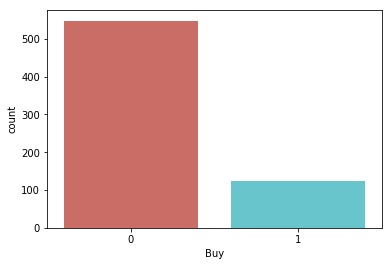

In [29]:
df_kid.Buy.value_counts()
sns.countplot(x = 'Buy', data = df_kid, palette = 'hls')
plt.show()

Aqui, precisamos dividir os dados dados em dois tipos de variável dependente (ou variável de meta) e variável independente (ou variáveis ​​de característica).

In [30]:
X = df_kid[['Income', 'Is Female', 'Is Married', 'Has College', 'Is Professional', 'Is Retired', 'Unemployed', 'Residence Length', 'Dual Income','Minors','Own', 'House','White',
'English', 'Prev Child Mag', 'Prev Parent Mag']]
y = df_kid['Buy']

Em seguida, dividimos 80% dos dados no conjunto de treinamento, enquanto 20% dos dados são testados usando o código abaixo. 
A variável test_size é onde nós especificamos a proporção do conjunto de testes.

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

 Instancie o modelo Regressão Logística usando a função padrão e use fit() para treinar seu modelo.

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Agora que treinamos nosso algoritmo, é hora de fazer algumas previsões. Para fazer isso, usaremos nossos dados de teste e veremos com precisão com que nosso algoritmo prevê a pontuação percentual. Para fazer previsões nos dados de teste, execute o seguinte script:

In [33]:
y_pred=logreg.predict(X_test)

Avaliação de modelos usando matriz de confusão

Vamos falar sobre a matriz de confusão pouco. Uma matriz de confusão é uma tabela geralmente usada para descrever o desempenho de um modelo de classificação em um conjunto de dados de teste para os quais os valores verdadeiros são conhecidos.

Alguns termos para lembrar no contexto da matriz de confusão, consulte a tabela abaixo:

- verdadeiros positivos (TP): Estes são os casos em que previmos sim e são, na verdade, sim.
- verdadeiros negativos (TN): Nós previmos que não, e não no real.
- falsos positivos (FP): previmos sim, mas real é não. (Erro tipo I)
- falsos negativos (FN): previmos que não, sim em reais. (Erro tipo II)

Há também uma lista de taxas que são frequentemente calculadas a partir de uma matriz de confusão para um classificador binário:

Acuracia: no geral, com que frequência o classificador está correto?
- Accuracy = (TP + TN) / total

Taxa de classificação incorreta (taxa de erros): Em geral, com que frequência está errada?
- Taxa de classificação incorreta = (FP + FN) / total

Taxa Positiva Verdadeira (Sensibilidade ou Recall): Quando na verdade é sim, com que frequência ela prevê sim?
- Recall = TP / sim real

Taxa positiva falsa: quando é realmente não, com que frequência ela prevê sim?
- Taxa positiva falsa = FP / não real

Taxa Negativa Verdadeira (Especificidade): Quando na verdade não, com que frequência ele não prevê?
- Taxa Negativa Verdadeira = TN / real não

Precision: Quando prevê sim, com que frequência está correto?
- Precision = TP / previu sim

Prevalência: Com que freqüência a condição de sim realmente ocorre em nossa amostra?
- Prevalência = sim real / total

Agora vamos voltar ao nosso problema original.

Então, vamos calcular a matriz de confusão tomando os dados de teste de parâmetros da variável alvo e os dados do alvo previsto.

In [34]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[106,   8],
       [  3,  18]])

Aqui, você pode ver a matriz de confusão na forma do objeto da matriz. A dimensão dessa matriz é 2 * 2 porque esse modelo é uma classificação binária. Você tem duas classes 0 e 1. Os valores da diagonal representam previsões precisas, enquanto os elementos não diagonais são previsões imprecisas. Na saída, 106 e 18 são previsões reais e 8 e 3 são previsões incorretas.

Visualizando matriz de confusão usando Heatmap
Vamos visualizar os resultados do modelo na forma de uma matriz de confusão usando matplotlib e seaborn.

Aqui, você visualizará a matriz de confusão usando o Heatmap.

In [35]:
class_names = y.unique()

Text(0.5, 257.44, 'Predicted label')

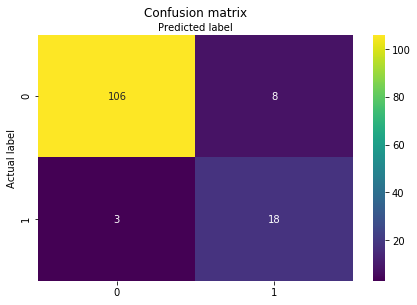

In [36]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Métricas de avaliação de matriz de confusão
Vamos avaliar o modelo usando métricas de avaliação de modelo, como exatidão, precisão e recuperação.

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9185185185185185
Precision: 0.6923076923076923
Recall: 0.8571428571428571


Bem, nosso modelo de classificação binária previu o resultado com 91% de precisão, que é considerado bom.

- Precisão : precisão é ser preciso, ou seja, quão preciso é o seu modelo. Em outras palavras, você pode dizer, quando um modelo faz uma previsão, com que frequência está correto. Em seu caso de previsão, quando seu modelo de regressão logística previa que os clientes comprariam a revista 69% do tempo.

- Recall ou sensibilidade : se houver clientes que compraram a revista em dados de teste e seu modelo de regressão logística puder identificá-la em 85% do tempo.

#### Curva ROC
A curva Receiver Operating Characteristic (ROC) é um gráfico da taxa positiva verdadeira (Recall) contra a taxa de falsos positivos. Mostra a troca entre sensibilidade e especificidade.

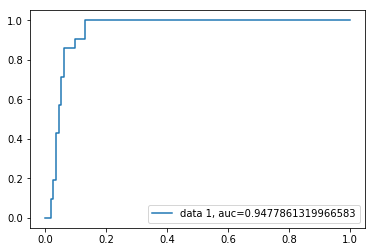

In [38]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

A pontuação AUC (Area Under Curve) para o caso é 0,94. O escore AUC 1 representa um classificador perfeito e 0,5 representa um classificador sem valor.

## Construção de modelo Regressão Logística multiclasse 

Uma regressão logística multiclasse é um método de classificação que generaliza a regressão logística para problemas multiclasse, ou seja, com mais de dois possíveis resultados discretos.

Vamos implementar a regressão logística multiclasse em dados produzidos pela Cardiotocograph. Depois de levar em consideração todos os parâmetros, nosso classificador irá prever o código da classe de estado fetal (NSP). NSP tem 3 classes a saber N = normal; S = suspeito; P = patológico

    A cardiotocografia ( CTG ) é um meio técnico de registrar o batimento cardíaco fetal e as contrações uterinas durante a gravidez . A máquina usada para realizar o monitoramento é chamada de cardiotocógrafo, mais conhecida como monitor fetal eletrônico (EFM).

A seguir estão os atributos do conjunto de dados.

LB - FHR baseline (batimentos por minuto)  
AC - # de acelerações por segundo  
FM - # de movimentos fetais por segundo  
UC - # de contrações uterinas por segundo  
DL - # de desacelerações por segundo  
DS - # de desacelerações severas por segundo  
DP - # de desacelerações prolongados de por segundo  
ASTV - percentagem de tempo com anormal variabilidade curto prazo  
MSTV - valor de variabilidade curto prazo significa  
percentagem de tempo com variabilidade anormal longo prazo - ALTV  
MLTV - valor médio de variabilidade a longo prazo  
largura - largura de RCF histograma  
min - mínimo de histograma de FHR  
Max - Máximo de histograma de FHR  
Nmax - # de picos de histograma  
Nzeros - # de histograma de zeros 
Modo - modo histograma  
Média - histograma médio  
Mediano - histograma mediano  
Variância - histograma variância  
Tendência - tendência histograma  
CLASS - FHR código de classe padrão (1 a 10)  
NSP - código de classe de estado fetal (N = normal; S = suspeito; P = patológico)

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:
df_ctg = pd.read_csv("ctg.csv", sep=';')

Se executarmos dataset.shape e obteremos o número de linhas e colunas. Para este caso, existem 2126 linhas e 40 colunas.

Agora vamos deixar colunas irrelevantes

In [49]:
df_ctg.shape

(2126, 40)

In [50]:
df_ctg = df_ctg.drop(columns=['FileName', 'SegFile', 'Date'])

Remover todos os valores nulos do conjunto de dados

In [51]:
df_ctg = df_ctg.dropna()

Explore os dados de destino e visualize-os.

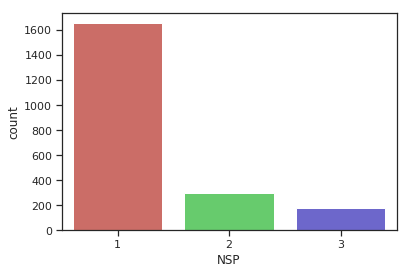

In [52]:
sns.countplot(x = 'NSP', data = df_ctg, palette = 'hls')
plt.show()

Agora, divida os dados fornecidos em dois tipos de variável dependente (ou variável de meta) e variável independente (ou variáveis ​​de característica).

In [53]:
X = df_ctg[['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV',
            'MLTV','DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax','Nzeros',
            'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD',
            'DE', 'LD', 'FS', 'SUSP', 'CLASS']]
y = df_ctg['NSP']

Em seguida, dividimos 75% dos dados no conjunto de treinamento, enquanto 25% dos dados para testar o conjunto usando o código abaixo.

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

Instancie o modelo de Regressão Logística usando a função padrão e use fit () para treinar seu modelo.

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594 entries, 1935 to 1653
Data columns (total 36 columns):
b           1594 non-null int64
e           1594 non-null int64
LBE         1594 non-null int64
LB          1594 non-null int64
AC          1594 non-null int64
FM          1594 non-null int64
UC          1594 non-null int64
ASTV        1594 non-null int64
MSTV        1594 non-null float64
ALTV        1594 non-null int64
MLTV        1594 non-null float64
DL          1594 non-null int64
DS          1594 non-null int64
DP          1594 non-null int64
DR          1594 non-null int64
Width       1594 non-null int64
Min         1594 non-null int64
Max         1594 non-null int64
Nmax        1594 non-null int64
Nzeros      1594 non-null int64
Mode        1594 non-null int64
Mean        1594 non-null int64
Median      1594 non-null int64
Variance    1594 non-null int64
Tendency    1594 non-null int64
A           1594 non-null int64
B           1594 non-null int64
C           1594 non-n

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Agora que treinamos nosso algoritmo, é hora de fazer algumas previsões.

In [57]:
y_pred=logreg.predict(X_test)

### Avaliação de modelos usando matriz de confusão

In [58]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[407,   2,   1],
       [  9,  63,   0],
       [  0,   0,  50]])

Aqui, você pode ver a matriz de confusão na forma do objeto da matriz. A dimensão dessa matriz é 3 * 3, pois é um classificador multiclasse. Você tem três classes 1,2 e 3. Os valores da diagonal representam previsões precisas, enquanto os elementos não diagonais são previsões imprecisas. Na saída, 404, 48 e 38 são previsões reais, enquanto todas as previsões são incorretas.

#### Visualizando matriz de confusão usando Heatmap
Vamos visualizar os resultados do modelo na forma de uma matriz de confusão usando matplotlib e seaborn.
Aqui, você visualizará a matriz de confusão usando o Heatmap.

Text(0.5, 257.44, 'Predicted label')

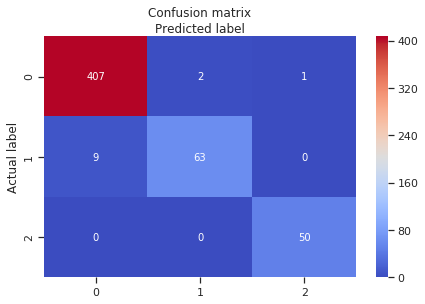

In [59]:
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Também vamos verificar a precisão do modelo.

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9774436090225563


Bem, nosso modelo de classificação Multiclasse previu o resultado com 97% de precisão, o que é considerado muito bom.

Vamos verificar quanta área está sob a curva ROC

In [61]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
auc = multiclass_roc_auc_score(y_test, y_pred, average="macro")
print("Area under curve : ", auc)

Area under curve :  0.9645816533570587


A pontuação AUC (Area Under Curve) para o caso é 0,96. O escore AUC 1 representa um classificador perfeito e 0,5 representa um classificador sem valor.

## Vantagens e Desvantagens da Regressão Logística
#### Vantagens:
É uma técnica amplamente usada porque é muito eficiente, não requer muitos recursos computacionais, é altamente interpretável, não requer recursos de entrada para serem dimensionados, não requer nenhum ajuste, é fácil de regularizar, e gera probabilidades previstas bem calibradas.

A regressão logística funciona melhor quando você remove atributos que não estão relacionados à variável de saída, bem como atributos que são muito semelhantes (correlacionados) entre si. Portanto, a Engenharia de Recursos desempenha um papel importante no que diz respeito ao desempenho da Logística e também da Regressão Linear.

Devido à sua simplicidade e ao fato de que ela pode ser implementada de maneira relativamente fácil e rápida, a Regressão Logística também é uma boa referência que você pode usar para medir o desempenho de outros Algoritmos mais complexos.

#### Desvantagens:
A regressão logística também não é um dos algoritmos mais poderosos e pode ser superada facilmente por outros mais complexos.

Além disso, não podemos resolver problemas não lineares com a regressão logística, uma vez que a superfície de decisão é linear.

A regressão logística não terá um bom desempenho com variáveis ​​independentes que não estejam correlacionadas com a variável de destino e sejam muito semelhantes ou correlacionadas entre si.